# Support Vector Machine

## Background reading:
*Intro to Statistical Learning*: Chapter 9， Section 9.1, 9.2, 9.3, Support Vector Machine(Page 368-385)

*Ethical Algorithm*: Chapter 2, Algorithmic Fairness, Bias by Analogy, (Page 57-63)

## Dataset:
**2 Attributes:**

1. Words (Specific vocabularies that are feminine, masculine or neutral)
2. Category

Datasets comes from: https://link.springer.com/article/10.3758/BF03195592

This tutorial aims at using SVM to classify whether a word is gender-biased. To deal with vocabulary in computer, background of Natural Language Processing is discussed here for you to read if you are interested in.

## Essence of Data

### Before Algorithms:Basic Concepts

In this section, we will first introduce some basic concepts to help you understand what is support vector machine.

**Hyperplane**

Def: A subspace which has one less dimension than its space.
E.g.,  In a 2-dimensional space, a hyperplane is in one dimension (a line); In a 3-dimensional space, a hyperplane is in two dimensions (a plane)



In [1]:
%load_ext rpy2.ipython

#This is used here to allow us to use both Python and R in Jupyter Notebook
# Before Running it, make sure that the IR kernel is installed to jupyter. You can also run these codes on r-studio for r languages

C:\Users\75994\anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
# Before run the code, make sure that you have already installed ggplot2 and plotly packages. 
# Load the package for ggplot2, which is an excellent package to draw statistical graphs
%R require('ggplot2')
# Package plotly is used for creating 3-d plots
%R require('plotly')

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: plotly

R[write to console]: 
Attaching package: 'plotly'


R[write to console]: The following object is masked from 'package:ggplot2':

    last_plot


R[write to console]: The following object is masked from 'package:stats':

    filter


R[write to console]: The following object is masked from 'package:graphics':

    layout




1


In [3]:
# Generate a data frame to help understand the hyperplane in 2-d/3-d
import pandas as pd
df2 = pd.DataFrame({
    'x':[0,1,1,2,2,3,3,4,4,4,5,5,6],
    'y':[5.2,3.8,4.9,2.5,5.5,3,4,2.2,3.4,4.6,3,2.1,1.5]
})


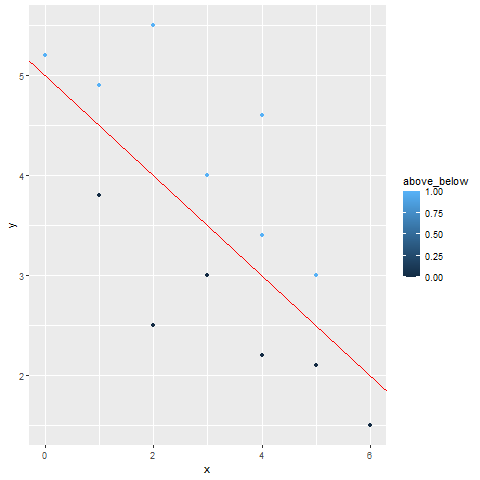

In [12]:
%%R -i df2
df2$above_below=ifelse(df2$y+0.5*df2$x-5>0,1,0)
df2
ggplot(df2, aes(x=x,y=y,col=above_below))+
       geom_point() + geom_abline(slope=-0.5,intercept=5,col='red')


In [35]:
df3 = pd.DataFrame({
    'x':[1,2,2,3,4,6,5,3,3],
    'y':[1,2,3,3,4,4,5,2,1],
    'z':[3,4,-7,-2,-4,-3,-12,-7,-9]
})

In [38]:
%%R -i df3
df3$above_below=ifelse(df3$x+df3$y+df3$z>0,1,0)
df3
input1=as.matrix(seq(1,6,0.1))
input2=as.matrix(seq(1,6,0.1))
input3=as.matrix(-input1-input2)

plot_ly(x=df3$x,y=df3$y,z=df3$z,type="scatter3d", mode="markers", color=df3$above_below)%>%
add_surface(x=input1,y=input2,z=input3)


The mathematical expression of the hyperplane in p-dimensions is:

<div align = 'center'><font size = '6'>$\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_px_p=0$</font></div>

From the graph above, the data points can be separated by a hyperplane in the space. When $\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_px_p>0$, the data points lie on one side of the hyperplane, while they lie on the other side when $\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_px_p<0$. It is reasonable to find out this natural classifier to do classification.

**Maximal Margin Classifier and Support Vector Classifier**

Margin: the perpendicular distance from the observation to the hyperplane

Maximal Margin Classifier: Among all the possible hyperplanes that can separate the data into categorizes, select the one that come up with the maximal margin.

**Support Vectors:**

In the space, there are some observations points that have equal distance from the maximal margin hyperplane. For example, in this graph there are some support vectors lie on the dashed line, with their distances shown as arrows. These observations are called support vectors since they “support” the hyperplane (when the support vectors move a little bit, the hyperplane will move as well, while the movement of other observations does not affect the hyperplane)

![Figure 9.3 From Textbook Page 372](./fig/SVM&WE/fig1.png)

**Support Vector Classifiers**

Sometimes the datasets cannot be separated perfectly by the hyperplane. In such case, support vector classifier is considered, which is a more generalized case of maximal margin classifier. We allow some of the observations to be on the wrong side of the margin/hyperplane. Details of the mathematical expression: page 375.

![Figure 9.6 From Textbook Page 376](./fig/SVM&WE/fig2.png)

Left: observation 1 and 8 are on the wrong side of the margin
Right: observation 11 and 12 are on the wrong side of the hyperplane

**Support Vector Machine:**

Sometimes the datasets cannot be separated by using a linear hyperplane, even we allow some of the observations to be on the wrong side. For example, it is impossible to build up a classifier by using a linear boundary for the data below. Thus, we need some techniques to increase the complexity and the non-linearity of the model to make good predictions. The technique is called kernel.

![Figure 9.8 From Textbook Page 379](./fig/SVM&WE/fig3.png)

What is **kernel**?

By using some kernel function to transform the data into, for example, higher dimensions, to ensure that the inner product is the same as the previous one, then to make it separable in the new case.

Examples of kernel functions:
Polynomial, Gaussian, RBF, Sigmoid, Radial, etc.

**Which kernel to choose?**

This is a very tricky problem and could be one of the drawbacks of SVM, since there are no good rules to follow. Sometimes you should try a lot of different kernel functions to reach out one best model. For example, for the data graph above, both kernel function of polynomial of degree 3 (left) and radial (right) works well.

![Figure 9.9 From Textbook Page 383](./fig/SVM&WE/fig4.png)

### Before Application: Background of Natural Language Processing

In this section, we will cover topics related to natural language processing(NLP)

**Word Processing**

	When dealing with the language (known as Natural Language Processing), unfortunately the computer cannot handle the characters/vocabularies and does not understand the meaning of them (Remember when the computer processes the characters, it will transform them into digital data by some encoding form such as Unicode or UTF-8). Consequently, it is necessary to translate the language into digital data before the computer can analyze. The most common techniques include one-hot encoding and word embedding.

Here are two useful articles related to the background:

**Power of NLP**

https://hbr.org/2022/04/the-power-of-natural-language-processing

**NLP and Google Translate**

https://www.kdnuggets.com/2017/09/machine-learning-translation-google-translate-algorithm.html

**What is word embedding?**

	When doing the natural language processing, associate a vector with a word where the vectors are learned from data. i.e., generate vectors that encodes the meaning of the words so that the words that are closed to each other in the space that we are interested are similar in their meanings. For example, in a space, we have a “gender” vectors and “plural” vectors. By adding a “female” vector to the vector “king/actor”, we obtain the vector “queen/actress”; by adding the “plural” vector we will obtain “kings/actors”

![Words on different axises](./fig/SVM&WE/fig5.jpg)


In [44]:
df_we = pd.DataFrame({
    'gender_axis':[1,1,3,3],
    'plural_axis':[1,3,1,3]
})

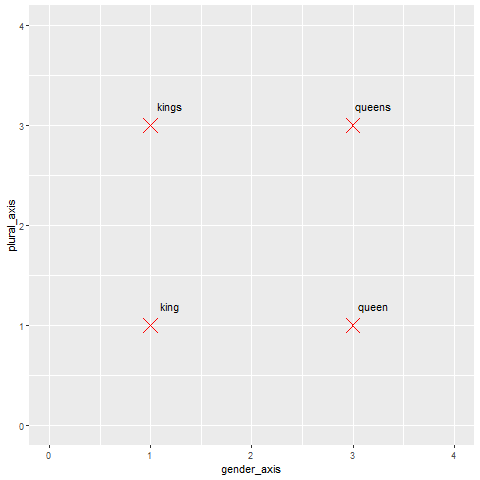

In [50]:
%%R -i df_we

ggplot(data=df_we) +
    geom_point(mapping = aes(x = gender_axis, y = plural_axis), shape = 4, size = 6, col = "red") +
    annotate("text", x = 1.2, y = 1.2, label = "king") +
    annotate("text", x = 3.2, y = 1.2, label = "queen") +
    annotate("text", x = 1.2, y = 3.2, label = "kings") +
    annotate("text", x = 3.2, y = 3.2, label = "queens") +
    scale_x_continuous(limits=c(0,4)) +
    scale_y_continuous(limits=c(0,4))

https://www.ibm.com/blogs/research/2018/11/word-movers-embedding/

![Words vectors in the space](./fig/SVM&WE/fig6.png)

**Why word embeddings?**

	When doing natural language processing, the computer itself does not understand the real meaning behind the vocabularies. It only processing the digital data. Thus, when dealing with languages (or any other non-digital data), we should figure out a way to transform the data into digital data (encoding) so that the computer can understand and process with it, then we get the result by decoding it.
	There are several different methods to transform the language. Another popular one is the one-hot encoding, which is also a common way. It consists of associating a unique integer index with every word and then turning the index into a binary vector of size of the vocabulary, while the other to be zero. i.e., the vector will be zeros except for that index to be 1. 
    
![Examples of one-hot encoding and Word Embeddings](./fig/SVM&WE/fig7.png)

	However, you may think about the downsides of word embeddings. Imagine if there are some neutral vocabularies that do not imply any gender, but it is predicted to be a gender-specific word (which is a bias! Because the word itself does not have any gender-bias) For example, one model may encodes “muscles”, “Programmer” and “game” with vectors that have more “male” values of projection on the gender axis. Sometimes the insufficient of the data will aggravate the bias further.




### Example of Codes

In this section we will try to use word embeddings and SVM as tools to process with words

In [1]:
# First, Import all packages
import numpy as np
import pandas as pd
import gensim
from gensim.models import KeyedVectors
from gensim import models
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.svm import SVC

*To make a word-embedding model, we will use gensim package which is sophisticated. To simplify understanding, we will use a pre-trained model (Word2Vec) by Google that contains millions of words that are trained based on its corpus. 

*The pre-trained model is described here: https://code.google.com/archive/p/word2vec/. The model contains millions of words with their vectors (thousands dimensions) with enormous size. 

**The pre-trained model can be downloaded from here:https://code.google.com/archive/p/word2vec/
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g
**


In [22]:
# Load the pre-trained model (It takes some time to run it cause the size is millions)
# ! Download from website and store it
word2vec_path = 'GoogleNews-vectors-negative300.bin.gz'
model = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
# Notice that model is a "Word2Vec" pre-trained model object here
model

In [8]:
dataset = pd.read_csv('WordEmbeddings.csv')
dataset

,Vocabulary,Category
0,Wife,Feminine
1,Princess,Feminine
2,Bridesmaid,Feminine
3,Pregnant,Feminine
4,Bride,Feminine
...,...,...
595,Testosterone,Masculine
596,Husband,Masculine
597,Father,Masculine
598,Brother,Masculine


In [26]:
# Access the vectors of the model
word_dict = dict({})
for index, key in enumerate(model.key_to_index):
    word_dict[key] = model.get_vector(key)

# Print
len(word_dict)

NameError: name 'head' is not defined

In [29]:
# The size is too large. Filter those that are useful
new_dict = dict((k, word_dict[k]) for k in dataset['Vocabulary'] if k in word_dict)
len(new_dict)

595

In [51]:
# Settle Database

x_all = list()
for x in new_dict.values():
    x_all.append(x)

print(len(x_all))
    


595


In [52]:
y_all = list()
for y in dataset['Vocabulary']:
    if y in new_dict.keys():
        y_all.append(y)

len(y_all)

595

In [92]:
# Separate into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size = 0.2, random_state = 43960)
len(x_test)

119

In [93]:
# Start SVM classifier
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

SVC()

In [94]:
# Check the Accuracy
svm_classifier.score(x_train, y_train)


1.0

In [95]:
# Check the Accuracy
svm_classifier.score(x_test, y_test)


0.0

## AI in the fabrics of society

Notice that the accuracy of the training data is perfect, but it does not work on testing data. That is to say, when we use machine to classify whether a word is gender-based or not, it will make its own decision that is **sometimes not accurate** for future predictions (since **machine itself does not understand the meaning of vocabulary**)

Although the accuracy sometimes is excellent for the machine learning algorithm, the problem is that sometimes it will cause some bias. For some vacabularies that is not a gender-based meaning, the algorithm will consider it to be a gender-related because of, for example, the occurance times of that words together with some other words(such as smoking may be considered to be a masculine word because it appears together with male more often than female)

Here is an article regarding this gender-biased problem: 

Man is to Computer Programmer as Woman is to Homemaker? | by Sheldon Sebastian | Towards Data Science
https://towardsdatascience.com/man-is-to-computer-programmer-as-woman-is-to-homemaker-e57b07cbde96